# Linear SVC 

In [46]:
# Bibliotecas usadas no código

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [47]:
# Dados para treino
# Features [Tem chifre ?; Relincha?; Tem ferradura?] (0 = Não; 1 = Sim)

moose1 = [1, 0, 1] 
moose2 = [1, 0, 0]
moose3 = [0, 0 , 0]
moose4 = [1, 1 , 0]
moose5 = [0, 0, 1]

horse1 = [0, 1, 1]
horse2 = [0, 1, 0]
horse3 = [1, 1, 0]
horse4 = [0, 0, 1]
horse5 = [0, 1, 1]

# Resultado dos dados para treino (0 = Moose; 1 = Horse)
train_x = [moose1, moose2, moose3, moose4, moose5, horse1, horse2, horse3, horse4, horse5]
train_y = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

In [48]:
# Treino

model = LinearSVC()
model.fit(train_x, train_y)

LinearSVC()

In [49]:
# Dados para teste

mistery1 = [1, 1, 1] 
mistery2 = [0, 0, 1]
mistery3 = [1, 0, 1]
mistery4 = [0, 1, 1]
mistery5 = [0, 0, 0]

test_x = [mistery1, mistery2, mistery3, mistery4, mistery5]
test_y = [1, 0, 0, 1, 0]
              
predict = model.predict(test_x)
print(predict)

[1 0 0 1 0]


In [50]:
# Medindo nosso teste

scores = accuracy_score(test_y, predict)
scores

1.0

# CSV Files

In [51]:
# Bibliotecas que serão utilizadas

import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

# Criando os cursores

model = LinearSVC()

In [52]:
# Carregar o dadabase

uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
db = pd.read_csv(uri)

rename = {
    'home': 'principal',
    'how_it_works': 'como_funciona',
    'contact': 'contatos',
    'bought': 'compras'
}

db_alterated = db.rename(columns = rename)

db_alterated
db.describe

<bound method NDFrame.describe of     home  how_it_works  contact  bought
0      1             1        0       0
1      1             1        0       0
2      1             1        0       0
3      1             1        0       0
4      1             1        0       0
..   ...           ...      ...     ...
94     0             0        1       0
95     1             1        1       1
96     0             0        1       0
97     0             1        0       0
98     0             0        0       0

[99 rows x 4 columns]>

In [53]:
# Vamos dividir as features X e Y para poder treinar 

db_x = db[['home', 'how_it_works', 'contact']]
db_y = db['bought']

print(db_x.shape)
print(db_y.shape)

(99, 3)
(99,)


In [54]:
# Treinar nossa máquina para predizer se um cliente irá ou não comprar algo baseado em seus acessos ao site

train_x = db_x[:30]
train_y = db_y[:30]

test_x = db_x[30:]
test_y = db_y[30:]

model.fit(train_x, train_y)

LinearSVC()

In [55]:
# Teste da nossa máquina

predict = model.predict(test_x)

In [56]:
# Medindo o resultado da máquina

accuracy = accuracy_score(test_y, predict) * 100
print('accuracy: %.2f' % (accuracy))

accuracy: 97.10


# Auto Split

In [57]:
# Biliotecas para auto split do treino e teste

from sklearn.model_selection import train_test_split

In [58]:
# Como separar treino_x/y e test_x/y automaticamente através do train_test_split
# Ordem correta = train_x, test_x, train_y, test_y

train_x, test_x, train_y, test_y = train_test_split(db_x, db_y, test_size = 0.25, 
                                                    random_state = 57, stratify = db_y)

In [59]:
# Treinando a maquina

model.fit(train_x, train_y)

LinearSVC()

In [60]:
# Testando nossa máquina

predict = model.predict(test_x)

In [61]:
# Medindo o resultado da nossa máquina

accuracy = accuracy_score(test_y, predict) * 100
print('Accuracy: %2.f' % accuracy)

Accuracy: 92


# Dimensions

In [62]:
# Bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import collections

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Cursores 

model = LinearSVC()

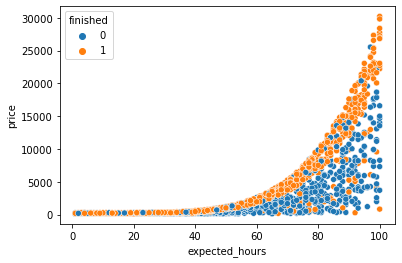

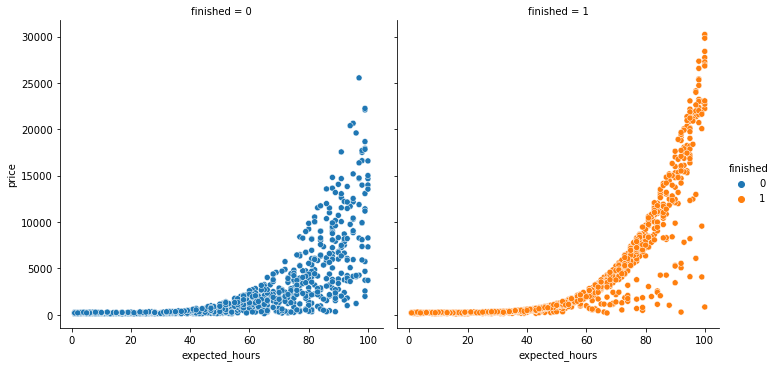

In [63]:
# Abrindo nosso data frame

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(uri)

# Modificando nosso data frame

change_infos = {
    0: 1,
    1: 0
}

df['finished'] = df.unfinished.map(change_infos)

# Separar dados de teste e treino

df_x = df[['expected_hours', 'price']]
df_y = df['finished']

# Analisando graficamente os resultados

sns.scatterplot (x = 'expected_hours', y = 'price', hue = 'finished', data = df)
sns.relplot (x = 'expected_hours', y = 'price', hue = 'finished', col = 'finished', data = df)

In [64]:
# Split dados

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.8, random_state = 57)
# Treinando nossa máquina

model.fit(train_x, train_y)

# Testar nossa máquina

predict = model.predict(test_x)

# Baseline

predict_guilherme = np.ones(1726)

# Medindo nossa máquina

accuracy = accuracy_score(test_y, predict) * 100
accuracy_guilherme = accuracy_score(test_y, predict_guilherme) * 100

print('Accuracy da máquina foi de %.1f\n' %accuracy) 
print('Accuracy do Guilherme foi de %.1f\n' %accuracy_guilherme) 

# Contagem de 0's e 1's

print(collections.Counter(predict_guilherme))
print(collections.Counter(predict))

Accuracy da máquina foi de 57.8

Accuracy do Guilherme foi de 51.3

Counter({1.0: 1726})
Counter({1: 1577, 0: 149})


C:\Users\guilh\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [65]:
# Decisin Boundery

x_min = test_x.expected_hours.min()
x_max = test_x.expected_hours.max()
y_min = test_x.price.min()
y_max = test_x.price.max()

pixels = 100
axle_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axle_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axle_x, axle_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)


#plt.contourf(xx, yy, Z, alpha = 0.3)
#plt.scatter(test_x.expected_hours, test_x.price, c = test_y, s = 1)

In [66]:
# !!! O SISTEMA ACIMA ESTÁ UTILIZANDO UM MODELO LINEAR, OU SEJA, ELE NÃO É CAPAZ DE APRENDER BASEADO EM 
# UMA CURVA COMO É O CASO AQUI 

# Curvy Models

In [67]:
# Bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import collections
import matplotlib.pyplot as plt 

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Cursores 

model = SVC()
scaler = StandardScaler()
seed = 57

# Modify 

np.random.seed(seed)

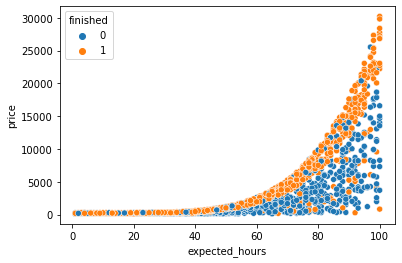

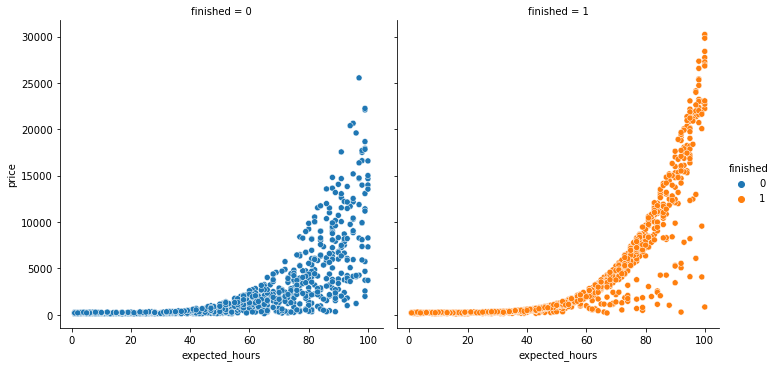

In [68]:
# Abrindo nosso data frame

uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
df = pd.read_csv(uri)

# Modificando nosso data frame

change_infos = {
    0: 1,
    1: 0
}

df['finished'] = df.unfinished.map(change_infos)

# Separar dados de teste e treino

df_x = df[['expected_hours', 'price']]
df_y = df['finished']

# Analisando graficamente os resultados

sns.scatterplot (x = 'expected_hours', y = 'price', hue = 'finished', data = df)
sns.relplot (x = 'expected_hours', y = 'price', hue = 'finished', col = 'finished', data = df)

In [69]:
# Vamos splitar nossos dados de treino e teste

raw_train_x, raw_test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.8)

# Reescalar nosso X

scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

# Treinar nossa máquina

model.fit(train_x, train_y)

# Testar nossa máquina

predict = model.predict(test_x)

# Medir nossa máquina 

predict_guilherme = np.ones(1726) # BaseLine

accuracy = accuracy_score(test_y, predict) * 100
accuracy_guilherme = accuracy_score(test_y, predict_guilherme) * 100

print('Accuracy da máquina foi de %.1f' %accuracy, '%\n') 
print('Accuracy do Guilherme foi de %.1f' %accuracy_guilherme, '%\n') 

# Contagem de 0's e 1's

print(collections.Counter(predict_guilherme))
print(collections.Counter(predict))

Accuracy da máquina foi de 62.1 %

Accuracy do Guilherme foi de 51.3 %

Counter({1.0: 1726})
Counter({1: 1456, 0: 270})


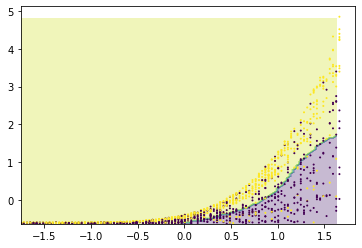

In [70]:
# Decision Boundery

data_x = test_x[:,0]
data_y = test_x[:,1]

x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
axle_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
axle_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(axle_x, axle_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = model.predict(pontos)
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = test_y, s = 1)

# Decision Tree + Linear SVC + SVC + Dummy Classifier

In [71]:
# Bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import requests
import json
import graphviz

from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Cursores

model_svc = SVC()
model_lsvc = LinearSVC()
baseline = DummyClassifier()
model_tree = DecisionTreeClassifier()

scaler = StandardScaler()
seed = 57

# Modify

np.random.seed(seed)

# API Valor dollar

url_02 = 'https://economia.awesomeapi.com.br/all/USD-BRL'
requirement = requests.get(url_02)
dolar_value = requirement.json()

dolar_value = float(dolar_value['USD']['bid'])
#print('Valor atual: R$%.2f' % dolar_value)

In [72]:
# Importando o dataframe que será utilizado

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
df = pd.read_csv(uri)
raw_df = pd.read_csv(uri)


# Alterando os dados do dataframe

sold_rename = {
    'yes': 1,
    'no': 0
}

df.sold = df.sold.map(sold_rename)


year = datetime.today().year

df['years_old'] = year - df['model_year']
df['km_per_year'] = df.mileage_per_year * 1.60934

df['pricee'] = df.price * dolar_value
df = df.drop(['price'], axis = 1)
df['price'] = df.pricee

df = df.drop(['Unnamed: 0', 'model_year', 'mileage_per_year', 'pricee'], axis = 1)
df.head()

,sold,years_old,km_per_year,price
0,1,21,35085.22134,176017.274576
1,1,23,12622.05362,230726.122848
2,0,15,11440.79806,509872.922000
3,0,6,43167.32682,542006.905232
4,1,7,12770.11290,667777.967584


In [73]:
# Separar dados para treino e teste

df_x = df[['years_old', 'km_per_year', 'price']]
df_y = df['sold']

raw_train_x, raw_test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.8, stratify = df_y)

# Treinar nossa máquina

scaler = scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

model_svc.fit(train_x, train_y)
model_lsvc.fit(train_x, train_y)
model_tree.fit(raw_train_x, train_y)
baseline.fit(train_x,train_y)

# Testar nossa máquina

predict_01 = model_svc.predict(test_x)
predict_02 = model_lsvc.predict(test_x)
predict_03 = model_tree.predict(raw_test_x)
predict_baseline = baseline.predict(test_x)


# Medir nossa máquina

accuracy_01 = accuracy_score(test_y, predict_01) * 100
accuracy_02 = accuracy_score(test_y, predict_02) * 100
accuracy_03 = accuracy_score(test_y, predict_03) * 100
accuracy_baseline = accuracy_score(test_y, predict_baseline) * 100

print('A taxa de acerto da máquina SVC foi: %.2f' %accuracy_01, '%')
print('A taxa de acerto da máquina LSVC foi: %.2f' %accuracy_02, '%')
print('A taxa de acerto da máquina TREE foi: %.2f' %accuracy_03, '%')
print('A taxa de acerto da baseline foi: %.2f'%accuracy_baseline, '%')

A taxa de acerto da máquina SVC foi: 75.15 %
A taxa de acerto da máquina LSVC foi: 70.14 %
A taxa de acerto da máquina TREE foi: 72.84 %
A taxa de acerto da baseline foi: 58.00 %


<AxesSubplot:xlabel='years_old', ylabel='price'>

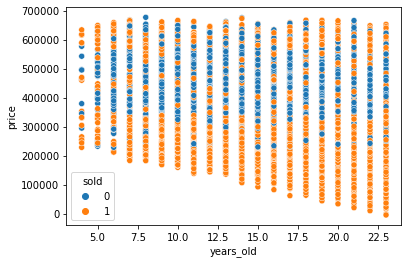

In [74]:
# Imprindo o gráfico do nossa dataframe

sns.scatterplot(x = 'years_old', y = 'price', hue = 'sold', data = df,)
#sns.relplot(x = 'years_old', y = 'price', col = 'sold', hue = 'sold', data = df,)

In [75]:
# Imprindo nossa Decision Tree
features_names =  df_x.columns
dot_data = export_graphviz(model_tree, out_file= None, filled = True, rounded = True, feature_names = features_names, class_names = ['não', 'sim'])
graph = graphviz.Source(dot_data)
#graph

# Categoric Variables

In [76]:
# Bibliotecas que serão utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier

import collections

#from sklearn.naive_bayes import MultinomialNB

# Modelos

model_svc = SVC()
model_dummy = DummyClassifier()

# Cursores

seed = 53
np.random.seed(seed)

In [77]:
# Abrindo os datas que serão utilizados

raw_df = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\cursos_alura.csv')
df = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\cursos_alura.csv')

# Modificando os dados do dataframe

rename_features_df = {
    'home': 'home',
    'busca': 'search',
    'logado': 'login',
    'comprou': 'bought'
}

df = df.rename(columns = rename_features_df)

rename_y_df = {
    0: 'no',
    1: 'yes'
}

df['bought'] = df['bought'].map(rename_y_df)
df['home'] = df['home'].map(rename_y_df)
df['login'] = df['login'].map(rename_y_df)

# Separando dados para treino e teste

raw_df_x = df[['home', 'search', 'login']]
raw_df_y = df['bought']

df_x = pd.get_dummies(raw_df_x) # Categoric variable sendo transformarda em Binary variable
df_y = raw_df_y 

df.head()

,home,search,login,bought
0,no,algoritmos,yes,yes
1,no,java,no,yes
2,yes,algoritmos,no,yes
3,yes,ruby,yes,no
4,yes,ruby,no,yes


In [78]:
# Separando dados para treino e teste

train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size = 0.9, stratify = df_y)

# Treinando nossa máquina 

model_svc.fit(train_x, train_y)
model_dummy.fit(train_x, train_y)

# Testando nossa máquina

predict_svc = model_svc.predict(test_x)
predict_dummy = model_dummy.predict(test_x)

# Medindo nossa máquina

accuracy_svc = accuracy_score(test_y, predict_svc) * 100
accuracy_dummy = accuracy_score(test_y, predict_dummy) * 100

print('The accuracy of the SVC machine is: %.2f' %accuracy_svc, '%')
print('The accuracy of the DUMMY machine is: %.2f' %accuracy_dummy, '%')

The accuracy of the SVC machine is: 85.00 %
The accuracy of the DUMMY machine is: 83.22 %


In [79]:
print(collections.Counter(predict_svc))
print(collections.Counter(predict_dummy))

Counter({'yes': 822, 'no': 78})
Counter({'yes': 900})


# Multidimensionality

In [80]:
# Bibliotecas que serão utilizadas 

import pandas as pd
import numpy as np 
import collections

from numpy.random import seed
from seaborn import heatmap

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import RFE

# Cursores

seed = 57
np.random.seed(seed)
# Modelos 

model_svc = SVC()
model_lsvc = LinearSVC(max_iter= 100)
model_forest =  RandomForestClassifier()
model_dummy = DummyClassifier()
model_kbest = SelectKBest(chi2, k= 10)
StandardScaler = StandardScaler()

In [81]:
# Dataframes que serão utilizados

df_raw = pd.read_csv("G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\cancer.csv")
df = df_raw

# Alterando o dataframe 

x = []

for c in range(1,34):

    old_name = str(f'exame_{c}')
    new_name = str(f'exam_{c}')

    rename_columns = {
        old_name: new_name
    }

    df = df.rename(columns= rename_columns)

    if c == 33:
        rename_columns = {
        'id': 'ID',
        'diagnostico': 'result',
        }

        df = df.rename(columns= rename_columns)
        #df['result'] = df['result'].map({'B': 0, 'M': 1})

        df = df.dropna()
        df = df.drop_duplicates()

    x.append(new_name)

def split():
    global df_raw_x, df_raw_y, df_x, df_y, raw_train_x, raw_test_x, train_y, test_y, scaler, train_x, test_x, train_x_kbest, test_x_kbest
    
    df_x = df_raw_x = df[x]
    df_y = df_raw_y = df['result']

    # Dividindo dados de treino e teste e reescalando 

    raw_train_x, raw_test_x, train_y, test_y = train_test_split(df_x, df_y, test_size= 0.6, stratify= df_y)

    scaler = StandardScaler.fit(raw_train_x)
    train_x = scaler.transform(raw_train_x)
    test_x = scaler.transform(raw_test_x)
    
    model_kbest.fit(raw_train_x, train_y)
    train_x_kbest = model_kbest.transform(raw_train_x)
    test_x_kbest = model_kbest.transform(raw_test_x)

split()

In [82]:
# Funcão para medir nossos modelos

def machine():
    global confusion_dummy, confusion_forest, confusion_svc

    # Listas para armazenar os resultados dos nossos modelos

    grade_svc = []
    #grade_lsvc = []
    grade_forest = []
    grade_dummy = []

    for  c in range(1):

        # Treinando nossos modelos
        # Looping para mediar várias vezes nossos modelos para obter uma média de desempenho 

        model_svc.fit(train_x, train_y)
        #model_lsvc.fit(train_x_kbest, train_y)
        model_forest.fit(train_x_kbest, train_y)
        model_dummy.fit(train_x, train_y)

        predict_svc = model_svc.predict(test_x)
        #predict_lsvc = model_lsvc.predict(test_x_kbest)
        predict_forest = model_forest.predict(test_x_kbest)
        predict_dummy = model_dummy.predict(test_x)

        # Medindo nosso modelos

        accuracy_svc = accuracy_score(predict_svc, test_y) * 100
        #accuracy_lsvc = accuracy_score(predict_lsvc, test_y) * 100
        accuracy_forest = accuracy_score(predict_forest, test_y) * 100
        accuracy_dummy = accuracy_score(predict_dummy, test_y) * 100

        # Armazenando nossas medições

        grade_svc.append(accuracy_svc)
        #grade_lsvc.append(accuracy_lsvc)
        grade_forest.append(accuracy_forest)
        grade_dummy.append(accuracy_dummy)

    grade_svc = np.mean(grade_svc)
    #grade_lsvc = np.mean(grade_lsvc)
    grade_forest = np.mean(grade_forest)
    grade_dummy = np.mean(grade_dummy)

    confusion_svc = confusion_matrix(test_y, predict_svc)
    confusion_forest = confusion_matrix(test_y, predict_forest)
    confusion_dummy = confusion_matrix(test_y, predict_dummy)

    print(f'A taxa de acerto do SVC foi de %.1f' % grade_svc)
    #print(f'A taxa de acerto do LSVC com KBEST foi de %.1f' % grade_lsvc)
    print(f'A taxa de acerto do Forest com KBEST foi de %.1f' % grade_forest)
    print(f'A taxa de acerto do Dummy foi de %.1f' % grade_dummy)

machine()

A taxa de acerto do SVC foi de 88.9
A taxa de acerto do Forest com KBEST foi de 90.0
A taxa de acerto do Dummy foi de 70.0


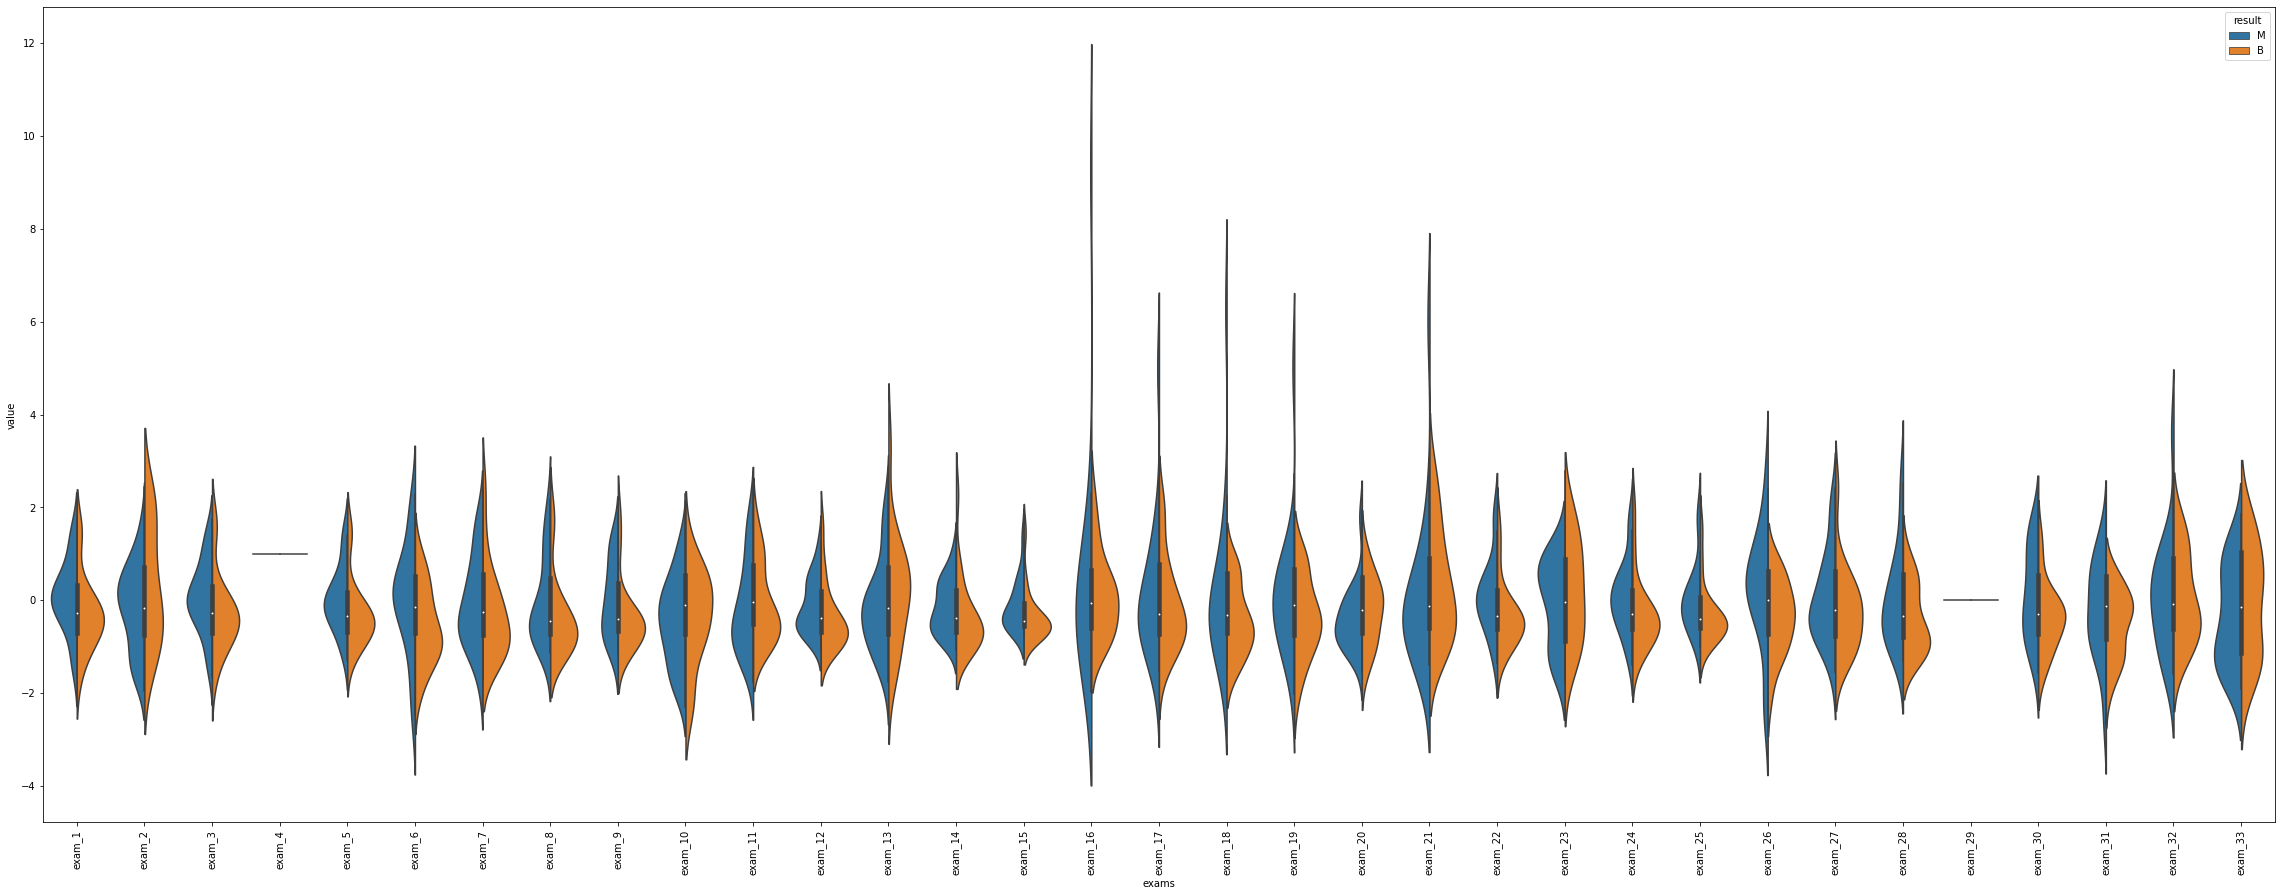

In [83]:
def graph():
    # Adaptando nossos dados para visualização 
    df_x_plot = scaler.transform(df_x)
    df_x_plot = pd.DataFrame(data= df_x_plot, columns= df_raw_x.keys())

    df_plot = pd.concat([df_y, df_x_plot], axis= 1)
    df_plot = pd.melt(df_plot, id_vars= 'result', value_name= 'value', var_name= 'exams')

    # Visualização dos nossos dados 

    plt.figure(figsize=(40,15))
    plt.xticks(rotation = 90)

    plot_01 = sns.violinplot(x = "exams", y = "value", 
                hue = "result", data = df_plot, split= True)
                    

    plot_01

graph()

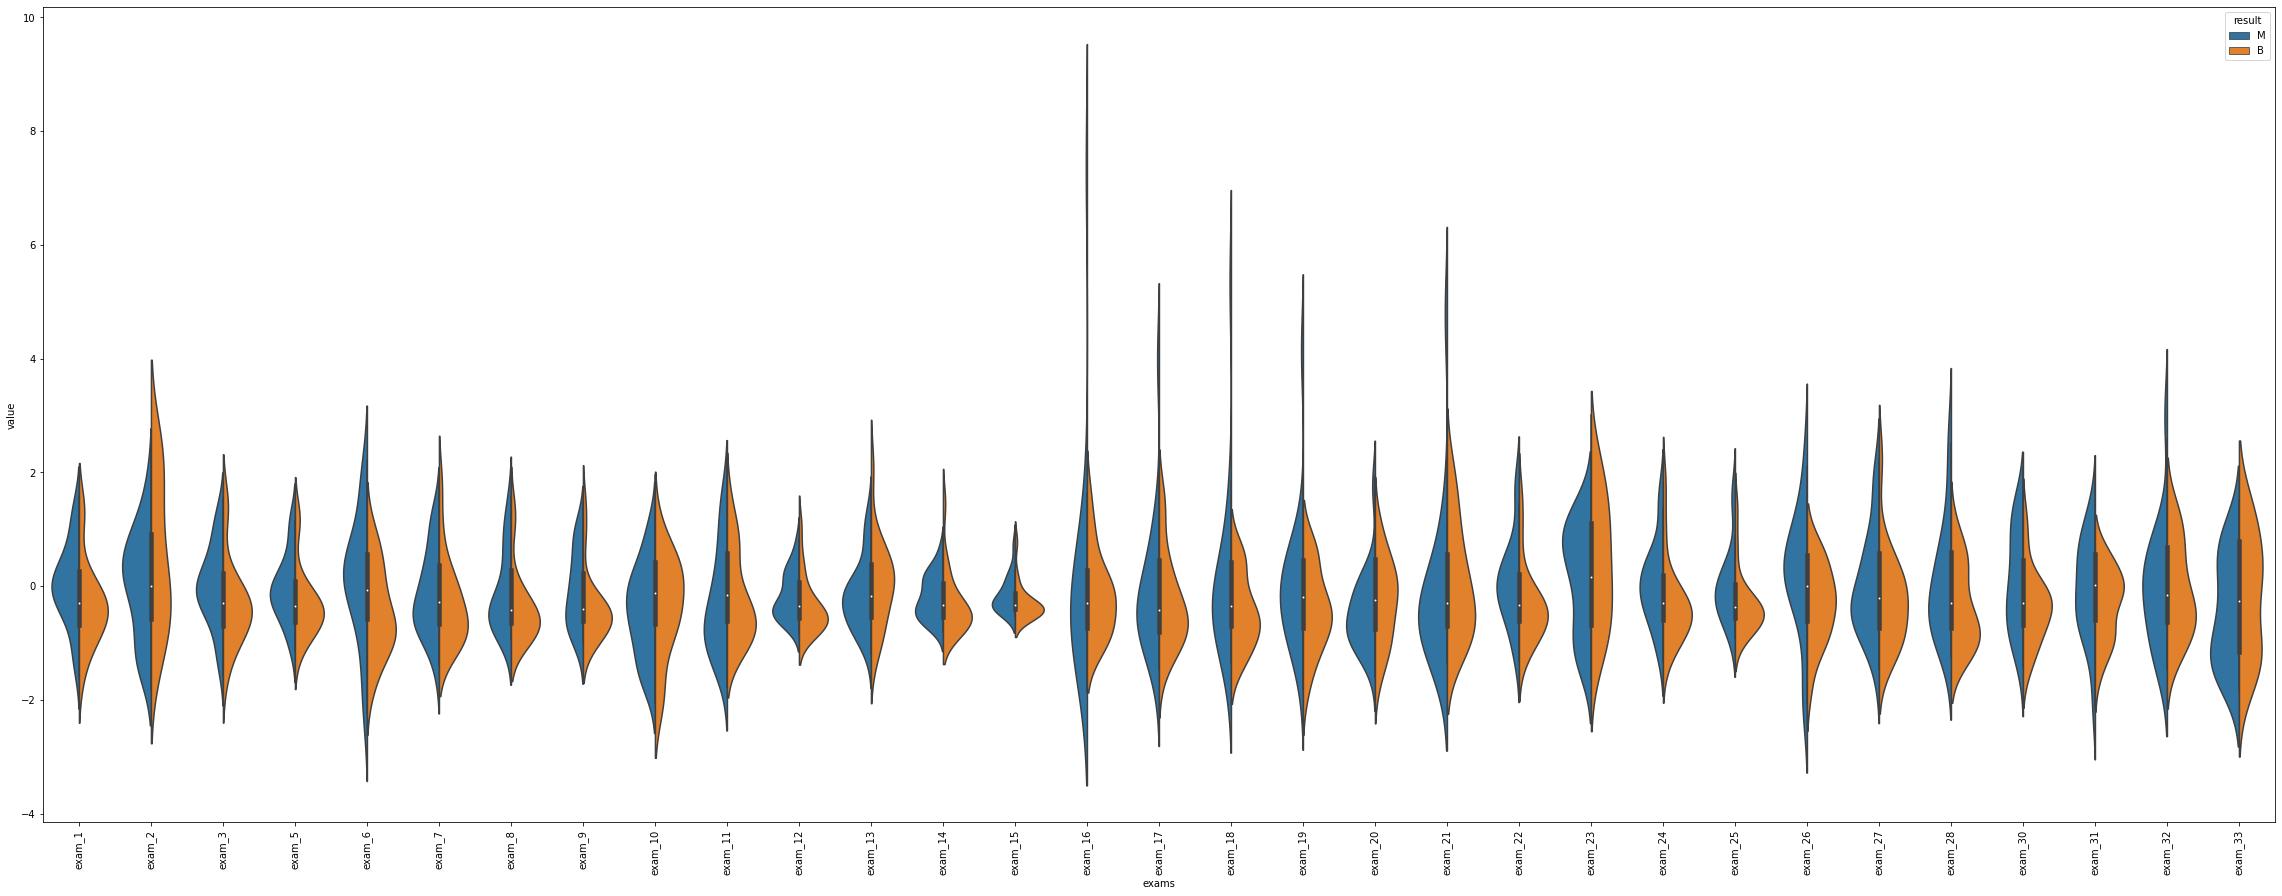

In [84]:
# Ecluindo colunas com valores constantes

df = df.drop(['exam_4', 'exam_29'], axis= 1)
x.remove('exam_4')
x.remove('exam_29')

# Resplitando dados e visualizando gráfico

split()
graph()

In [85]:
# Visualizando a correlação dos dados 

def def_heatmap(var):
    plt.figure(figsize=(30, 10))
    sns.heatmap(var, annot= True, fmt= ".1f")

#heatmap(df_x.corr())

correlation_matrix = df_x.corr()[df_x.corr() > 0.99].sum()
correlation_vars = correlation_matrix[correlation_matrix > 1]

# Excluindo dados altamente correlacionados

df = df.drop(['exam_3', 'exam_24'], axis= 1)
x.remove('exam_3')
x.remove('exam_24')

split()
machine()

A taxa de acerto do SVC foi de 92.2
A taxa de acerto do Forest com KBEST foi de 93.3
A taxa de acerto do Dummy foi de 70.0


In [86]:
#def_heatmap(confusion_svc)
#def_heatmap(confusion_forest)

A taxa de acerto do RFE foi de 96.7


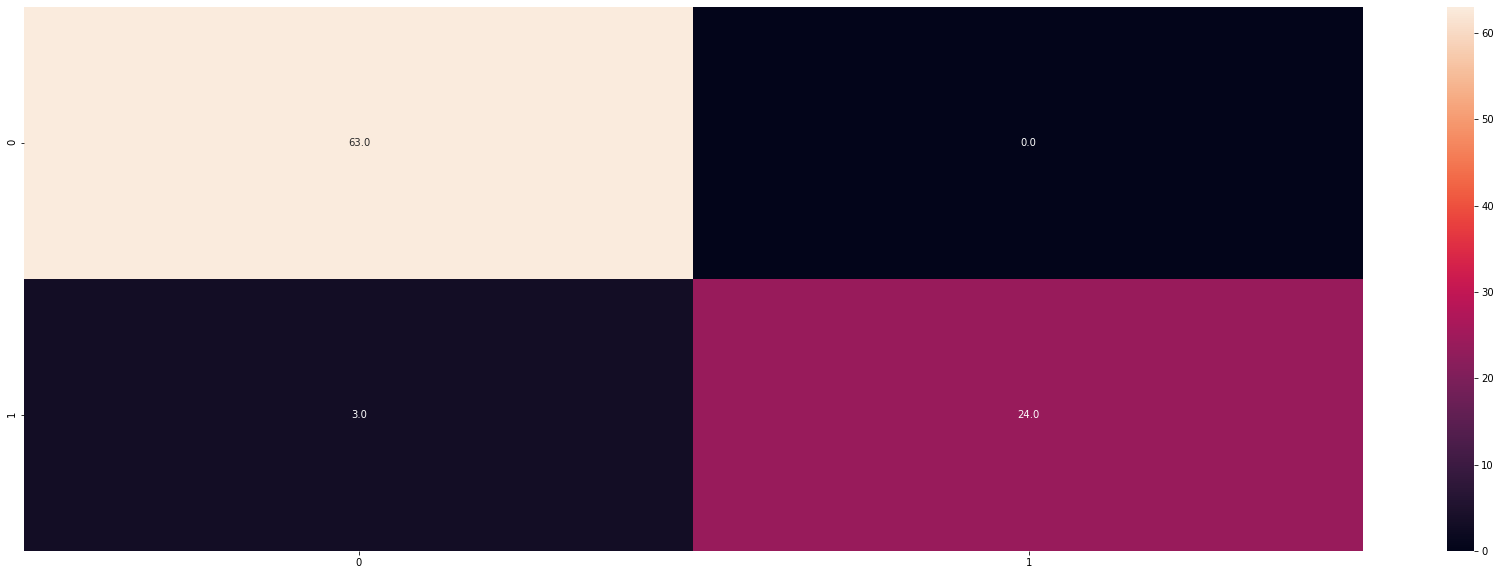

In [87]:
# Criando um modelo RFE para nossa predição 

model_rfe = RFE(estimator= model_forest, n_features_to_select= 5, step= 1)
model_rfe.fit(train_x, train_y)

train_rfe = model_rfe.transform(train_x)
test_rfe = model_rfe.transform(test_x)

model_forest.fit(train_rfe, train_y)
predict_rfe = model_forest.predict(test_rfe)
accuracy_rfe = accuracy_score(predict_rfe, test_y) * 100
print(f'A taxa de acerto do RFE foi de %.1f' % accuracy_rfe)

confusion_rfe = confusion_matrix(test_y, predict_rfe)
def_heatmap(confusion_rfe)

# Basic Clustering 

In [88]:
import pandas as pd
import plotly.graph_objects as go 
import numpy as np 
import matplotlib.pyplot as plt

from seaborn import heatmap
from biokit.viz import corrplot
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score

In [89]:
# Dataframes à ser utilizados

df_raw = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\wine.csv')

# Escalando nosso dataframe de 0 a 1 

min_max_scaler = preprocessing.MinMaxScaler()
np_df = min_max_scaler.fit_transform(df_raw)
df = pd.DataFrame(np_df, columns = df_raw.columns)

In [90]:
# Correlação dos nossos dados 

matrix_corr = df.corr()

# Printando a correlação dos nossos dados

def def_corrplot(var):
    corr_graph = corrplot.Corrplot(var)
    corr_graph.plot(upper= 'ellipse', fontsize = 'x-large')
    fig_corr = plt.gcf()
    fig_corr.set_size_inches(15, 15)
    fig_corr.show()

def def_heatmap(var):
    plt.figure(figsize=(30, 10))
    sns.heatmap(var, annot= True, fmt= ".1f")

#print(def_corrplot(matrix_corr))
#print(def_heatmap(matrix_corr))

In [91]:
# Coeficiente de Silhueta Kmeans

def silhouette_graph(var1):

    if var1 == 'KMeans':
        n_clusters = [i for i in range(2,10)]
        silhouette_values = []
        print(n_clusters)

        for k in n_clusters:
            cluster = KMeans(n_clusters = k)
            labels = cluster.fit_predict(df)
            silhouette_mean = silhouette_score(df, labels)
            silhouette_values.append(silhouette_mean)

        fig = go.Figure()
        fig.add_trace(go.Scatter(x = n_clusters, y = silhouette_values))
        fig.update_layout(
        title = 'Valores de Silhueta Médios',
        xaxis_title = 'Número de Clústeres',
        yaxis_title = 'Valor médio de silhueta',
        )
        fig.show()

    elif var1 == 'MeanShift':
        range_quantil = np.linspace(0.02, 0.5, 30)
        #print(range_quantil)

        silhouette_values = []
        quantil_plot = []

        for quantil in range_quantil:
            bandwidth = estimate_bandwidth(df, quantile = quantil)
            cluster = MeanShift(bandwidth = bandwidth)
            labels = cluster.fit_predict(df)

            if (len(np.unique(labels)) < len(df) and  len(np.unique(labels)) > 1):
                silhouette_mean = silhouette_score(df, labels)
                silhouette_values.append(silhouette_mean)
                quantil_plot.append(quantil)

        fig = go.Figure()
        fig.add_trace(go.Scatter(x = quantil_plot, y = silhouette_values))
        fig.update_layout(dict(
        xaxis_title = 'Quantil',
        yaxis_title = 'Média Silhueta'
        )) 
        fig.show()

    elif var1 == 'null':
        pass

#silhouette_graph('KMeans')
#silhouette_graph('MeanShift')

In [92]:
# Clustering 

def def_kmeans():
    global  cluster_kmeans, labels_kmeans
    cluster_kmeans = KMeans(3)
    labels_kmeans = cluster_kmeans.fit_predict(df)

    print(f'Labels: {np.unique(labels_kmeans)}')
    print(f'O coeficiente de silhueta do KMeans foi: {silhouette_score(df, labels_kmeans)}')
        
def def_dbscan():
    global  cluster_dbscan, labels_dbscan
    cluster_dbscan = DBSCAN(eps = 1.31, min_samples = 15, metric = 'manhattan')
    labels_dbscan = cluster_dbscan.fit_predict(df)

    print(f'Labels: {np.unique(labels_dbscan)}')
    print(f'O coeficiente de silhueta do DBSCAN foi: {silhouette_score(df, labels_dbscan)}')

def def_meanshift():
    global  cluster_meanshift, labels_meanshift
    band_width = estimate_bandwidth(df, quantile = 0.3)
    cluster_meanshift = MeanShift(band_width)
    labels_meanshift = cluster_meanshift.fit_predict(df)

    print(f'Labels: {np.unique(labels_meanshift)}')
    print(f'O coeficiente de silhueta do MeanShift foi: {silhouette_score(df, labels_meanshift)}')

#def_kmeans()
#def_dbscan()
#def_meanshift()

In [93]:
# Visualizando o Clustering

def cluster_graph(var1, var2, x, y, z):

    if var1 == 'kmeans':
        cluster = cluster_kmeans
        labels = labels_kmeans
    
    elif var1 == 'dbscan':
        cluster = cluster_dbscan
        labels = labels_dbscan
    
    elif var1 == 'meanshift':
        cluster = cluster_meanshift
        labels = labels_meanshift


    if var2 == '2d':
        fig_cluster = go.Figure()
        fig_cluster.add_trace(go.Scatter(x = df[x], y = df[y], mode = 'markers', marker = dict(color = cluster.labels_.astype(np.float)), text = labels))

        fig_cluster.show()
    
    elif var2 == '3d':
        fig_cluster = go.Figure()
        fig_cluster.add_trace(go.Scatter3d(x = df[x], y = df[y], z = df[z], mode = 'markers', marker = dict(color = cluster.labels_.astype(np.float)), text = labels))
        fig_cluster.update_layout(scene = dict(
            xaxis_title =  str(x),
            yaxis_title =  str(y),
            zaxis_title =  str(z)))

        fig_cluster.show()
    
    elif var2 == 'null':
        pass


# 2d view

#print(cluster_graph('kmeans', '2d', 'Color_Intensity', 'Alcohol', 'Proline'))
#print(cluster_graph('dbscan', '2d', 'Color_Intensity', 'Alcohol', ''))
#print(cluster_graph('meanshift', '2d', 'Color_Intensity', 'Alcohol', ''))

# 3d view

#print(cluster_graph('kmeans', '3d', 'Color_Intensity', 'Alcohol', 'Proline'))
#print(cluster_graph('dbscan', '3d', 'Color_Intensity', 'Alcohol', 'Proline'))
#print(cluster_graph('meanshift', '3d', 'Color_Intensity', 'Alcohol', 'Proline'))

# Clustering Data Patterns 

In [116]:
# Tratar parcialmente os dados do dataframe #Colunas inúteis #Dados altamente correlacionados
# Analisar os melhores clusters e escolher um
# Medir e comparar o Cluster selecionado
# Filtrar as melhores colunas para clusterizar
# Filtrar os melhores valores para clusterizar
# Separar devidamente os cluster

In [94]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go 
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import Normalizer
from sklearn import metrics

In [95]:
df_raw = pd.read_csv('G:\Meu Drive\My Repositories\My Laboratory\Jupyter Lab\databases\datasets\\credit_card.csv')

In [96]:
# Alterando nosso dataframe

# Dropando colunas com dados inúteis ou repetidos 

df = df_raw.drop(columns= ['CUST_ID', 'TENURE'])

# Preenchendo valores nulos

df = df.fillna(df.median())

# Normalizando nossos dados 

normalized_values = Normalizer().fit_transform(df.values)
df = pd.DataFrame(normalized_values, columns = df.columns)

# Dados correlacionados

def correlation_graph(var1):
    matrix_corr = var1.corr()
    plt.figure(figsize=(30, 10))
    sns.heatmap(matrix_corr, annot= True, fmt= '.1f')

    correlation_matrix = var1.corr()[var1.corr() > 0.9].sum()
    correlation_vars = correlation_matrix[correlation_matrix > 1]
    print(correlation_vars)

#correlation_graph(df)

# Dropando colunas altamente correlacionadas

df = df.drop(columns= ['PURCHASES_INSTALLMENTS_FREQUENCY'])

In [97]:
# Clusters Scores: Silhouette, Davies_Bouldin, Calinski


def kmeans_multi_scores(data, var1, Silhouette, Davies_Bouldin, Calinski):

    n_clusters = [i for i in range(2,var1)]
    print(n_clusters)

    if Silhouette == 'Silhouette':

        silhouette_values = []

        for k in n_clusters:
            cluster = KMeans(n_clusters = k, n_init= 10, max_iter= 300)
            labels = cluster.fit_predict(data)
            silhouette_mean = metrics.silhouette_score(data, labels)
            silhouette_values.append(silhouette_mean)

        fig = go.Figure()
        fig.add_trace(go.Scatter(x = n_clusters, y = silhouette_values))
        fig.update_layout(
            title = 'Valores de Silhueta Médios',
            xaxis_title = 'Número de Clústeres',
            yaxis_title = 'Valor médio de silhueta',
            )

        fig.show()

    if Davies_Bouldin == 'DBS':

        davies_bouldin_values = []

        for k in n_clusters:
            cluster = KMeans(n_clusters = k, n_init= 10, max_iter= 300)
            labels = cluster.fit_predict(data)
            davies_bouldin_mean = metrics.davies_bouldin_score(data, labels)
            davies_bouldin_values.append(davies_bouldin_mean)

        fig = go.Figure()
        fig.add_trace(go.Scatter(x = n_clusters, y = davies_bouldin_values))
        fig.update_layout(
            title = 'Valores de DBS Médios',
            xaxis_title = 'Número de Clústeres',
            yaxis_title = 'Valor médio de DBS',
            )

        fig.show()

    if Calinski == 'Calinski':

        calinski_values = []

        for k in n_clusters:
            cluster = KMeans(n_clusters = k, n_init= 10, max_iter= 300)
            labels = cluster.fit_predict(data)
            calinski_mean = metrics.calinski_harabasz_score(data, labels)
            calinski_values.append(calinski_mean)

        fig = go.Figure()
        fig.add_trace(go.Scatter(x = n_clusters, y = calinski_values))
        fig.update_layout(
            title = 'Valores de Calinski Médios',
            xaxis_title = 'Número de Clústeres',
            yaxis_title = 'Valor médio de Calinski',
            )

        fig.show()

def kmeans_unique_scores(data, var1, Silhouette, Davies_Bouldin, Calinski):

    global silhouette_mean, davies_bouldin_mean, calinski_mean, cluster_kmeans, labels_kmeans
    
    cluster_kmeans = KMeans(n_clusters = var1, n_init= 10, max_iter= 300)
    labels_kmeans = cluster_kmeans.fit_predict(data)

    if Silhouette == 'Silhouette':

        silhouette_mean = metrics.silhouette_score(data, labels_kmeans)
        print('O valor do Silhouette foi igual a: %.3f' %silhouette_mean)


    if Davies_Bouldin == 'DBS':

        davies_bouldin_mean = metrics.davies_bouldin_score(data, labels_kmeans)
        print(f'O valor do score Davies foi igual a: %.3f' %davies_bouldin_mean)

    if Calinski == 'Calinski':

        calinski_mean = metrics.calinski_harabasz_score(data, labels_kmeans)
        print(f'O valor do score Calinski foi igual a: %.3f' %calinski_mean)


#kmeans_multi_scores(df, 20, 'Silhouette', 'DBS', 'Calinski')
#kmeans_unique_scores(df, 6, 'Silhouette', 'DBS', 'Calinski')

In [98]:
# Medindo nosso Cluster com o melhor agrupador

print(f'Valores do Cluster:')
kmeans_unique_scores(df, 6, 'Silhouette', 'DBS', 'Calinski')

# Comparando nosso Cluster

random_data = np.random.rand(8950, 15)

#print(f'\nValores do Cluster Random:')
#kmeans_unique_scores(random_data, 6, 'Silhouette', 'DBS', 'Calinski')

# Verificando a estabilidade do nosso Cluster

set1, set2, set3 = np.array_split(df, 3)

#print(f'\nValores de estabilidade do Cluster:')
#print('\nSet1:'), kmeans_unique_scores(set1, 6, 'Silhouette', 'DBS', 'Calinski')
#print('\nSet2:'), kmeans_unique_scores(set2, 6, 'Silhouette', 'DBS', 'Calinski')
#print('\nSet3:'), kmeans_unique_scores(set3, 6, 'Silhouette', 'DBS', 'Calinski')

Valores do Cluster:
O valor do Silhouette foi igual a: 0.365
O valor do score Davies foi igual a: 1.045
O valor do score Calinski foi igual a: 3523.518


In [99]:
# Visualizando KMeans Cluster

def kmeans_graph(data, var1, x, y, z):

    cluster = cluster_kmeans
    labels = labels_kmeans
    
    if var1 == '2d':
        fig_cluster = go.Figure()
        fig_cluster.add_trace(go.Scatter(x = data[x], y = data[y], mode = 'markers', marker = dict(color = cluster.labels_.astype(np.float)), text = labels))


    elif var1 == '3d':
        fig_cluster = go.Figure()
        fig_cluster.add_trace(go.Scatter3d(x = data[x], y = data[y], z = data[z], mode = 'markers', marker = dict(color = cluster.labels_.astype(np.float)), text = labels))
        fig_cluster.update_layout(scene = dict(
            xaxis_title =  str(x),
            yaxis_title =  str(y),
            zaxis_title =  str(z)))

    fig_cluster.show()

#kmeans_graph(df, '2d', 'PURCHASES', 'PAYMENTS', '')

In [100]:
# Selecionando os melhores atributos

centroids = cluster_kmeans.cluster_centers_
max = len(centroids[0])

for i in range(max):
    if centroids[:, i].var() < 0.01:
        pass
    else:
        print(df.columns.values[i], f'%.5f' %centroids[:, i].var())
    


BALANCE 0.02541
PURCHASES 0.01832
CASH_ADVANCE 0.03448
CREDIT_LIMIT 0.03480
PAYMENTS 0.02998
MINIMUM_PAYMENTS 0.05388


In [114]:
# Filtrando os valores dos atributos

df['cluster'] = labels_kmeans

description = df.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']

n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients

description

<ipython-input-114-6471cec9c8b8>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  description = df.groupby('cluster')['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PRC_FULL_PAYMENT']


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PRC_FULL_PAYMENT,n_clients
cluster,,,,,,
0,0.154600,0.443775,0.026255,0.603086,7.313296e-05,1487
1,0.561746,0.083323,0.105009,0.720741,1.160171e-07,1795
2,0.229045,0.068526,0.365403,0.523024,3.093662e-05,980
3,0.371231,0.041355,0.501341,0.707727,2.407840e-06,1143
4,0.297208,0.149291,0.060518,0.341176,4.462432e-06,342
5,0.065189,0.122178,0.019693,0.945484,7.797763e-05,3203


In [115]:
# Geral sobre cada cluster :

#Melhores: 00: Boa quantidade de clientes; 05: Maior quantidade de clientes > 4.690
# Cluster 00: Gasto é pouco. Maiores compradores. Sacam pouco. Limite médio. Alta % de pagamento
# Cluster 05: Menor Gasto. Compram pouco. Menor taxa de saque. Maior limite. Maior % de pagamento

#Bons: 02 & 04: Menores quantidades de clientes > 1.322
# Cluster 02: Gasto médio baixo. Compram pouco. Sacam com constância. Limite médio. % Média de pagamento
# Cluster 04: Gasto médio baixo. Compram pouco. Sacam pouco. Menor limite. % Média de pagamento

#Ruins: 03: Alta quantidade de clientes > 1143
# Cluster 03: Gasto médio. Compram pouco. Mais sacam. Limite alto. Baixa % de pagamento

#Piores: 01: Alta quantidade de cleintes > 1795
# Cluster 01: Maior Gasto. Menores compradores. Sacam as vezes. Limite alto. Menor % de pagamento

# Model validation

In [67]:
import pandas as pd 
import numpy as np
import random

from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import KFold

# Cursores

seed = 57
np.random.seed = seed

# Modelos

model_tree = DecisionTreeClassifier(max_depth = 3)

In [68]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/e99a526b2e7ccc6c3b70f53db43a87d2/raw/1605fc74aa778066bf2e6695e24d53cf65f2f447/machine-learning-carros-simulacao.csv'

df_raw = pd.read_csv(uri)

In [70]:
# Alterando nosso dataframe

# Excluindo colunas que não serão utilizadas

df = df_raw.drop(columns=(['Unnamed: 0']))

# Separando os dados do resultado

x = df.drop(columns=['vendido'])
y = df['vendido']

# Separando dados de treino e teste 

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.5, stratify= y )

# Criando valores aleatórios para testar nosso modelo com valores desconhecidos 

df['random_group'] = df.idade_do_modelo + np.random.randint(-1,5, size= 10000) 

In [75]:
# Treinando nosso modelo 

model_tree.fit(train_x, train_y)

# Testando nosso modelo 

predict_tree = model_tree.predict(test_x)

# Medindo nosso modelo 

accuracy_tree = accuracy_score(test_y, predict_tree) * 100
print(f'O nosso modelo DecisionTree obteve uma acurácia de: {accuracy_tree: .2f}')

O nosso modelo DecisionTree obteve uma acurácia de:  78.50


In [63]:
# Cross Validation com KFold

cv = KFold(n_splits= 10, shuffle= True)
cross_validation_result = cross_validate(model_tree, x, y, cv= cv)

cross_validate_test_score = cross_validation_result['test_score']
cross_validate_test_score_mean = cross_validate_test_score.mean()
cross_validate_test_score_deviation = cross_validate_test_score.std()
cross_validate_test_score_deviation_smaller =  (cross_validate_test_score_mean - 2 * cross_validate_test_score_deviation) *100
cross_validate_test_score_deviation_bigger = (cross_validate_test_score_mean + 2 * cross_validate_test_score_deviation) * 100

print(f'O accuracy do cross validation médio é: {(cross_validate_test_score_mean) *100: .2f}')
print(f'O accuracy do cross validation está entre: {cross_validate_test_score_deviation_smaller: .2f} e {cross_validate_test_score_deviation_bigger: .2f}')

O accuracy do cross validation médio é:  78.67
O accuracy do cross validation está entre:  77.04 e  80.30


In [64]:
# Cross Validation com StratifiedKfold

cv = StratifiedKFold(n_splits= 10, shuffle= True)
cross_validation_result = cross_validate(model_tree, x, y, cv= cv)

cross_validate_test_score = cross_validation_result['test_score']
cross_validate_test_score_mean = cross_validate_test_score.mean()
cross_validate_test_score_deviation = cross_validate_test_score.std()
cross_validate_test_score_deviation_smaller =  (cross_validate_test_score_mean - 2 * cross_validate_test_score_deviation) *100
cross_validate_test_score_deviation_bigger = (cross_validate_test_score_mean + 2 * cross_validate_test_score_deviation) * 100

print(f'O accuracy do cross validation médio é: {(cross_validate_test_score_mean) *100: .2f}')
print(f'O accuracy do cross validation está entre: {cross_validate_test_score_deviation_smaller: .2f} e {cross_validate_test_score_deviation_bigger: .2f}')

O accuracy do cross validation médio é:  78.67
O accuracy do cross validation está entre:  75.89 e  81.45


In [65]:
# Cross Validation com GroupKfold

cv = GroupKFold()
cross_validation_result = cross_validate(model_tree, x, y, cv= cv, groups= df.random_group)

cross_validate_test_score = cross_validation_result['test_score']
cross_validate_test_score_mean = cross_validate_test_score.mean()
cross_validate_test_score_deviation = cross_validate_test_score.std()
cross_validate_test_score_deviation_smaller =  (cross_validate_test_score_mean - 2 * cross_validate_test_score_deviation) *100
cross_validate_test_score_deviation_bigger = (cross_validate_test_score_mean + 2 * cross_validate_test_score_deviation) * 100

print(f'O accuracy do cross validation médio é: {(cross_validate_test_score_mean) *100: .2f}')
print(f'O accuracy do cross validation está entre: {cross_validate_test_score_deviation_smaller: .2f} e {cross_validate_test_score_deviation_bigger: .2f}')

O accuracy do cross validation médio é:  78.65
O accuracy do cross validation está entre:  76.26 e  81.05


# Model optimization